<a href="https://colab.research.google.com/github/tz2004a/sklearnWork/blob/Google-Colab-Notebooks/FINAL_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import svm
from sklearn.datasets import fetch_openml
X, y = fetch_openml('qsar-biodeg', return_X_y=True)
df = X
df['y'] = y
X

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,y
0,3.919,2.6909,0.0,0.0,0.0,0.0,0.0,31.4,2.0,0.0,...,0.0,0.0,0.0,2.949,1.591,0.0,7.253,0.0,0.0,2
1,4.170,2.1144,0.0,0.0,0.0,0.0,0.0,30.8,1.0,1.0,...,0.0,0.0,0.0,3.315,1.967,0.0,7.257,0.0,0.0,2
2,3.932,3.2512,0.0,0.0,0.0,0.0,0.0,26.7,2.0,4.0,...,0.0,0.0,1.0,3.076,2.417,0.0,7.601,0.0,0.0,2
3,3.000,2.7098,0.0,0.0,0.0,0.0,0.0,20.0,0.0,2.0,...,0.0,0.0,1.0,3.046,5.000,0.0,6.690,0.0,0.0,2
4,4.236,3.3944,0.0,0.0,0.0,0.0,0.0,29.4,2.0,4.0,...,0.0,0.0,0.0,3.351,2.405,0.0,8.003,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0.0,0.0,0.0,2.0,0.0,32.1,4.0,1.0,...,0.0,6.0,1.0,3.573,2.242,1.0,8.088,0.0,0.0,1
1051,5.287,3.3732,0.0,0.0,9.0,0.0,0.0,35.3,0.0,9.0,...,0.0,3.0,0.0,3.787,3.083,3.0,9.278,0.0,0.0,1
1052,4.869,1.7670,0.0,1.0,9.0,0.0,5.0,44.4,0.0,4.0,...,4.0,13.0,0.0,3.848,2.576,5.0,9.537,1.0,0.0,1
1053,5.158,1.6914,2.0,0.0,36.0,0.0,9.0,56.1,0.0,0.0,...,1.0,16.0,0.0,5.808,2.055,8.0,11.055,0.0,1.0,1


In [ ]:
# Split training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, y_train.shape

((67, 20), (67,))

In [ ]:
#Decision Tree training
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
clf = clf.fit(X_test, y_test)
clf.get_params()
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#Decision Tree training (TESTING cross_val_predict)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
clf = DecisionTreeClassifier()
clf = clf.fit(X_test, y_test)
clf.get_params()
predict = cross_val_predict(clf, X_train, y_train, cv=10)
predict

array(['1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '2', '1',
       '1', '2', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '2', '1', '1', '2', '1', '1',
       '1', '1', '1', '1', '2', '2', '1', '2', '2', '1', '1', '2', '1',
       '1', '1', '1', '1', '2', '2', '2', '1', '1', '2', '2', '2', '1',
       '1', '1', '1', '2', '2', '1', '1', '1', '1', '2', '2', '1', '1',
       '2', '1', '2', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1',
       '1', '2', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1',
       '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1',
       '2', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '2', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '1', '2',
       '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2',
       '1', '2', '2', '1', '1', '1', '2', '1', '2', '1', '1', '2', '2',
       '2', '2', '1', '2', '2', '1', '1', '2', '1', '1', '1', '2

In [ ]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,y
649,5.369,2.4228,2.0,2.0,8.0,0.0,4.0,32.4,0.0,5.0,...,4.0,2.0,6.0,4.714,3.000,4.0,10.183,0.0,0.0,1
580,4.792,1.7397,6.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,...,0.0,4.0,0.0,4.476,1.850,2.0,9.806,0.0,0.0,1
58,5.175,3.9016,0.0,0.0,0.0,1.0,0.0,29.6,3.0,3.0,...,0.0,0.0,0.0,3.389,2.538,0.0,7.979,0.0,0.0,2
117,4.475,3.5408,0.0,0.0,0.0,0.0,0.0,32.4,2.0,4.0,...,0.0,0.0,0.0,3.474,2.083,0.0,8.622,0.0,0.0,2
480,4.783,2.2890,0.0,0.0,0.0,0.0,0.0,42.9,1.0,0.0,...,0.0,0.0,0.0,3.594,1.704,0.0,7.933,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,4.560,4.4123,0.0,0.0,0.0,0.0,0.0,33.3,4.0,4.0,...,0.0,0.0,0.0,3.542,2.250,0.0,8.631,0.0,0.0,2
833,5.051,3.5320,0.0,0.0,2.0,0.0,0.0,30.0,2.0,6.0,...,0.0,2.0,6.0,3.519,2.435,1.0,8.710,0.0,0.0,1
484,5.393,2.1651,0.0,0.0,0.0,1.0,2.0,47.4,2.0,0.0,...,0.0,0.0,0.0,3.697,1.931,0.0,8.770,0.0,0.0,1
104,3.950,2.7989,0.0,0.0,0.0,0.0,0.0,31.0,2.0,1.0,...,0.0,0.0,1.0,2.976,1.857,0.0,7.552,0.0,0.0,2


In [ ]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,y
953,5.077,2.4109,0.0,0.0,0.0,0.0,4.0,47.1,3.0,0.0,...,0.0,0.0,0.0,3.760,1.875,0.0,8.680,0.0,0.0,1
146,4.770,2.8938,0.0,0.0,0.0,0.0,2.0,41.7,3.0,0.0,...,0.0,0.0,0.0,3.646,1.867,0.0,8.083,0.0,0.0,2
514,5.516,2.7057,1.0,0.0,2.0,0.0,4.0,41.4,0.0,2.0,...,4.0,4.0,4.0,4.738,2.681,2.0,9.664,0.0,0.0,1
98,3.000,1.8227,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,1.0,2.642,2.167,1.0,5.834,0.0,0.0,2
155,5.156,2.4524,0.0,0.0,0.0,0.0,4.0,55.6,0.0,6.0,...,0.0,0.0,0.0,3.986,3.271,0.0,9.007,4.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,5.177,3.0834,2.0,0.0,0.0,0.0,5.0,52.6,0.0,1.0,...,3.0,0.0,1.0,4.122,2.504,0.0,9.163,0.0,2.0,1
548,4.214,4.0251,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,4.0,3.496,3.528,4.0,7.753,0.0,0.0,1
942,4.993,2.2683,0.0,0.0,0.0,0.0,3.0,35.8,2.0,1.0,...,1.0,0.0,1.0,3.725,1.800,0.0,8.621,0.0,0.0,1
585,4.838,2.2234,0.0,0.0,2.0,0.0,0.0,33.3,0.0,0.0,...,0.0,5.0,0.0,3.502,1.697,2.0,7.886,0.0,0.0,1


In [ ]:
clf.predict(X_test)

array(['2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '2', '2', '2', '1', '1', '1', '2', '2', '1', '2', '1',
       '1', '2', '2', '2', '2', '1', '2', '1', '2', '1', '1', '1', '1',
       '2', '1', '1', '2', '2', '1', '1', '2', '2', '1', '1', '1', '1',
       '2', '2', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '1',
       '1', '2', '2', '1', '2', '1', '2', '2', '1', '1', '1', '1', '1',
       '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '2', '1', '2',
       '2', '2', '1', '1', '1', '1', '1', '1', '2', '2', '1', '2', '1',
       '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '2', '1',
       '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1',
       '1', '2', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2',
       '1', '1', '1', '2', '2', '1', '1', '1', '2', '1', '1', '2', '1',
       '1', '1', '1', '2', '2', '1', '2', '1', '1', '1', '1', '2', '2',
       '1', '2', '2', '1', '1', '2', '2', '2', '1', '2', '1', '1

In [ ]:
#Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(max_iter=1000).fit(X_train, y_train)
#clf.predict(X_test[:5, :])
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

NameError: ignored

In [ ]:
#Working MLP
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

array([1.        , 0.875     , 0.75      , 1.        , 0.875     ,
       1.        , 0.85714286, 0.85714286, 0.85714286, 1.        ])

In [ ]:
#Trying to implement the Working MLP
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = fetch_openml('qsar-biodeg', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([0.875     , 0.83544304, 0.88607595, 0.82278481, 0.86075949,
       0.78481013, 0.79746835, 0.94936709, 0.82278481, 0.84810127])

In [ ]:
#WORKING MLP
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = fetch_openml('qsar-biodeg', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([0.83098592, 0.8028169 , 0.87323944, 0.84507042, 0.90140845,
       0.77464789, 0.81428571, 0.88571429, 0.82857143, 0.85714286])

In [ ]:
#WORKING DECISIONTREECLASSIFIER
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = fetch_openml('qsar-biodeg', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = DecisionTreeClassifier().fit(X_test, y_test)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([0.8028169 , 0.70422535, 0.78873239, 0.85915493, 0.85915493,
       0.78873239, 0.84285714, 0.7       , 0.7       , 0.77142857])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

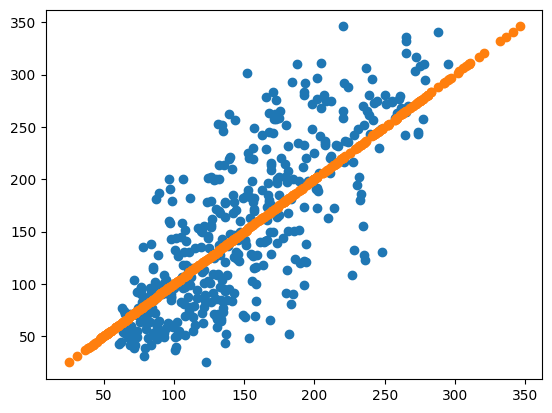

In [ ]:
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipe.fit(X, y)
Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])
pred = pipe.predict(X)
plt.scatter(pred, y)

In [ ]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41
81,5.637,2.2966,0.0,0.0,0.0,1.0,0.0,38.5,3.0,0.0,...,2.0,0.0,0.0,0.0,3.676,1.658,0.0,8.065,0.0,0.0
53,4.691,3.8787,0.0,0.0,0.0,0.0,0.0,25.0,0.0,4.0,...,0.0,0.0,2.0,4.0,3.483,4.019,1.0,8.015,0.0,0.0
102,4.444,3.1402,0.0,0.0,0.0,0.0,0.0,29.6,3.0,1.0,...,0.0,0.0,0.0,1.0,3.096,2.093,0.0,7.197,0.0,0.0
391,4.649,2.3407,0.0,1.0,7.0,0.0,3.0,46.2,0.0,0.0,...,0.0,3.0,8.0,2.0,3.712,2.200,3.0,8.678,0.0,0.0
683,5.386,2.1526,0.0,0.0,0.0,0.0,6.0,60.0,0.0,2.0,...,0.0,0.0,0.0,0.0,4.029,2.367,0.0,9.184,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,5.394,2.8307,3.0,1.0,3.0,0.0,4.0,37.0,1.0,4.0,...,0.0,4.0,8.0,1.0,4.748,3.086,2.0,9.947,0.0,2.0
273,4.399,3.3815,1.0,0.0,0.0,0.0,0.0,32.6,2.0,4.0,...,0.0,0.0,0.0,0.0,3.646,1.855,0.0,9.204,0.0,0.0
133,4.170,3.2723,0.0,0.0,0.0,0.0,0.0,22.2,1.0,3.0,...,0.0,0.0,0.0,2.0,3.333,4.433,0.0,7.299,0.0,0.0
585,4.838,2.2234,0.0,0.0,2.0,0.0,0.0,33.3,0.0,0.0,...,0.0,0.0,5.0,0.0,3.502,1.697,2.0,7.886,0.0,0.0


In [ ]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41
748,4.414,3.8100,1.0,0.0,0.0,0.0,0.0,28.6,2.0,2.0,...,0.0,0.0,0.0,0.0,3.822,3.087,0.0,8.259,0.0,1.0
847,4.383,3.1398,0.0,0.0,0.0,0.0,0.0,31.6,1.0,3.0,...,0.0,0.0,0.0,2.0,3.329,2.214,0.0,8.270,0.0,0.0
571,5.350,2.0188,4.0,0.0,0.0,0.0,12.0,53.3,0.0,7.0,...,0.0,4.0,0.0,2.0,4.180,2.932,0.0,10.094,2.0,4.0
926,4.919,1.1387,0.0,0.0,2.0,0.0,4.0,41.0,0.0,4.0,...,0.0,2.0,8.0,0.0,3.731,1.919,2.0,9.366,0.0,0.0
45,4.562,3.8122,0.0,0.0,0.0,0.0,0.0,33.3,1.0,2.0,...,0.0,0.0,0.0,1.0,3.511,3.556,0.0,7.676,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,4.895,3.4879,1.0,0.0,1.0,0.0,3.0,41.2,1.0,2.0,...,0.0,2.0,2.0,0.0,3.974,3.010,1.0,8.886,0.0,1.0
217,4.863,2.4397,1.0,0.0,0.0,0.0,3.0,54.5,0.0,0.0,...,0.0,1.0,0.0,0.0,6.879,1.981,0.0,11.612,0.0,1.0
752,5.291,4.2076,0.0,0.0,0.0,1.0,0.0,32.0,3.0,3.0,...,0.0,0.0,0.0,0.0,3.567,2.871,0.0,8.163,0.0,0.0
1037,4.807,3.1717,0.0,0.0,0.0,0.0,3.0,42.9,3.0,0.0,...,0.0,0.0,0.0,0.0,3.698,1.889,0.0,8.086,0.0,0.0
